# First Dataset EV_Cars_India

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('EV_cars_India_2023.csv')

In [3]:
df1.head()

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN


In [4]:
df1.dtypes

Car_name        object
Car_price       object
Batter_cap      object
Drive_range     object
Power           object
Charge_time     object
transmission    object
Boot_space      object
Top_speed       object
dtype: object

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_name      30 non-null     object
 1   Car_price     30 non-null     object
 2   Batter_cap    27 non-null     object
 3   Drive_range   30 non-null     object
 4   Power         30 non-null     object
 5   Charge_time   30 non-null     object
 6   transmission  28 non-null     object
 7   Boot_space    12 non-null     object
 8   Top_speed     6 non-null      object
dtypes: object(9)
memory usage: 2.2+ KB


In [6]:
df1.describe

<bound method NDFrame.describe of                  Car_name            Car_price Batter_cap  \
0             MG Comet EV           7.98  lakh   17.3 kWh   
1           Tata Tiago EV   8.69 - 11.99  lakh   19.2 KWh   
2           Tata Tigor EV  12.49 - 13.75  lakh     26 kWh   
3                MG ZS EV  23.38 - 27.40  lakh   50.3 kWh   
4              BYD Atto 3  33.99 - 34.49  lakh  60.48 kWh   
5   Hyundai Kona Electric  23.84 - 24.03  lakh    39.2kWh   
6      Mahindra XUV400 EV  15.99 - 18.99  lakh   34.5 kWh   
7       Tata Nexon EV Max  16.49 - 19.54  lakh   40.5 kWh   
8       Mercedes-Benz EQS      1.59 - 2.4 lakh   17.3 kWh   
9          Audi e-tron GT               1.7 cr   19.2 KWh   
10                 BMW i4  73.90 - 77.50  lakh     26 kWh   
11                 BYD E6          29.15  lakh   50.3 kWh   
12         Porsche Taycan      1.53 - 2.3 lakh  60.48 kWh   
13      Audi RS e-tron GT               1.9 cr    39.2kWh   
14      Mahindra E Verito    9.13 - 9.46  lakh   34

In [7]:
df1.isnull().sum()

Car_name         0
Car_price        0
Batter_cap       3
Drive_range      0
Power            0
Charge_time      0
transmission     2
Boot_space      18
Top_speed       24
dtype: int64

## Preprocessing

In [8]:
#To deal with batter_cap we can use the mean and put it in place of nan values
df1['Batter_cap'] = pd.to_numeric(df1['Batter_cap'].str.extract('(\d+\.\d+)')[0], errors='coerce')

# Round the values to 2 decimal places
df1['Batter_cap'] = round(df1['Batter_cap'], 2)

# Calculate the mean and fill NaN values with it
mean_batter_cap = df1['Batter_cap'].mean()
df1['Batter_cap'].fillna(mean_batter_cap, inplace=True)

In [9]:
df1.head()

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.300000,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.200000,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,49.085217,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.300000,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.480000,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN


In [10]:
df1.isnull().sum()

Car_name         0
Car_price        0
Batter_cap       0
Drive_range      0
Power            0
Charge_time      0
transmission     2
Boot_space      18
Top_speed       24
dtype: int64

In [11]:
#To deal with the null values of transmission
df1['transmission'].fillna(method='ffill', inplace=True)

In [12]:
df1.isnull().sum()

Car_name         0
Car_price        0
Batter_cap       0
Drive_range      0
Power            0
Charge_time      0
transmission     0
Boot_space      18
Top_speed       24
dtype: int64

In [13]:
# Too many NaN values present in Boot_space and Top_speed columns so they don't contribute much
df1.drop(['Boot_space', 'Top_speed'], axis=1, inplace=True)

In [14]:
df1

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission
0,MG Comet EV,7.98 lakh,17.300000,230 km/full charge,41.42 Bhp,7 Hours,Automatic
1,Tata Tiago EV,8.69 - 11.99 lakh,19.200000,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters)
2,Tata Tigor EV,12.49 - 13.75 lakh,49.085217,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters)
3,MG ZS EV,23.38 - 27.40 lakh,50.300000,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic
4,BYD Atto 3,33.99 - 34.49 lakh,60.480000,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters)
5,Hyundai Kona Electric,23.84 - 24.03 lakh,39.200000,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic
6,Mahindra XUV400 EV,15.99 - 18.99 lakh,34.500000,375 s km/full charge,50min,Automatic,Automatic
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.500000,453 km/full charge,141.04 Bhp,15 Hours,350 L (Liters)
8,Mercedes-Benz EQS,1.59 - 2.4 lakh,17.300000,230 km/full charge,41.42 Bhp,7 Hours,Automatic
9,Audi e-tron GT,1.7 cr,19.200000,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters)


In [15]:
def normalize_price(value):
    if ' - ' in value:  # If it's a range like '12.49 - 13.75 lakh'
        upper_value = float(value.split(' - ')[1].split()[0])
        return upper_value
    elif 'cr' in value:  # If it's in Crores like '2 Cr'
        return float(value.split()[0]) * 100  # Convert Crores to lakhs
    else:  # If it's already in lakhs like '3.5 lakh'
        return float(value.split()[0])

# Apply the function to the 'Car_price' column
df1['Car_price'] = df1['Car_price'].apply(normalize_price)

In [16]:
df1.rename(columns={'Car_price': 'Car_price_in_Lakhs'}, inplace=True)

In [17]:
df1

,Car_name,Car_price_in_Lakhs,Batter_cap,Drive_range,Power,Charge_time,transmission
0,MG Comet EV,7.98,17.300000,230 km/full charge,41.42 Bhp,7 Hours,Automatic
1,Tata Tiago EV,11.99,19.200000,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters)
2,Tata Tigor EV,13.75,49.085217,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters)
3,MG ZS EV,27.40,50.300000,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic
4,BYD Atto 3,34.49,60.480000,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters)
5,Hyundai Kona Electric,24.03,39.200000,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic
6,Mahindra XUV400 EV,18.99,34.500000,375 s km/full charge,50min,Automatic,Automatic
7,Tata Nexon EV Max,19.54,40.500000,453 km/full charge,141.04 Bhp,15 Hours,350 L (Liters)
8,Mercedes-Benz EQS,2.40,17.300000,230 km/full charge,41.42 Bhp,7 Hours,Automatic
9,Audi e-tron GT,170.00,19.200000,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters)


In [18]:
# Function to extract upper values from 'Drive_range' column
def extract_drive_range(value):
    if pd.notnull(value) and isinstance(value, str):  # Check if the value is a non-null string
        # Extract numeric values using regular expression
        numeric_values = re.findall(r'\d+\.\d+|\d+', value)
        
        if not numeric_values:
            return None  # No numeric values found
        
        # Handle different cases based on the number of values
        if len(numeric_values) == 1:
            return float(numeric_values[0])
        elif len(numeric_values) == 2:
            # Take the upper value in case of a range
            return float(numeric_values[1])
        else:
            # Special case for '375 s km/full charge'
            return float(numeric_values[0])
    else:
        return value

# Apply the function to 'Drive_range'
df1['Drive_range'] = df1['Drive_range'].apply(extract_drive_range)

# Print the updated DataFrame
df1

,Car_name,Car_price_in_Lakhs,Batter_cap,Drive_range,Power,Charge_time,transmission
0,MG Comet EV,7.98,17.300000,230.0,41.42 Bhp,7 Hours,Automatic
1,Tata Tiago EV,11.99,19.200000,250.0,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters)
2,Tata Tigor EV,13.75,49.085217,315.0,73.75 Bhp,7.5h,316 L (Liters)
3,MG ZS EV,27.40,50.300000,461.0,174.33 Bhp,8.5 to 9 Hours,Automatic
4,BYD Atto 3,34.49,60.480000,521.0,201.15 Bhp,9.5-10 Hours,440L L (Liters)
5,Hyundai Kona Electric,24.03,39.200000,452.0,134.1 Bhp,6.16 Hours,Automatic
6,Mahindra XUV400 EV,18.99,34.500000,375.0,50min,Automatic,Automatic
7,Tata Nexon EV Max,19.54,40.500000,453.0,141.04 Bhp,15 Hours,350 L (Liters)
8,Mercedes-Benz EQS,2.40,17.300000,230.0,41.42 Bhp,7 Hours,Automatic
9,Audi e-tron GT,170.00,19.200000,250.0,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters)


In [19]:
df1.rename(columns={'Drive_range': 'Drive_range_in_km/full charge'}, inplace=True)

In [20]:
df1

,Car_name,Car_price_in_Lakhs,Batter_cap,Drive_range_in_km/full charge,Power,Charge_time,transmission
0,MG Comet EV,7.98,17.300000,230.0,41.42 Bhp,7 Hours,Automatic
1,Tata Tiago EV,11.99,19.200000,250.0,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters)
2,Tata Tigor EV,13.75,49.085217,315.0,73.75 Bhp,7.5h,316 L (Liters)
3,MG ZS EV,27.40,50.300000,461.0,174.33 Bhp,8.5 to 9 Hours,Automatic
4,BYD Atto 3,34.49,60.480000,521.0,201.15 Bhp,9.5-10 Hours,440L L (Liters)
5,Hyundai Kona Electric,24.03,39.200000,452.0,134.1 Bhp,6.16 Hours,Automatic
6,Mahindra XUV400 EV,18.99,34.500000,375.0,50min,Automatic,Automatic
7,Tata Nexon EV Max,19.54,40.500000,453.0,141.04 Bhp,15 Hours,350 L (Liters)
8,Mercedes-Benz EQS,2.40,17.300000,230.0,41.42 Bhp,7 Hours,Automatic
9,Audi e-tron GT,170.00,19.200000,250.0,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters)


In [21]:
# Function to extract upper values from 'Power' column
def extract_power(value):
    if pd.notnull(value) and isinstance(value, str):  # Check if the value is a non-null string
        # Extract numeric values using regular expression
        numeric_values = re.findall(r'\d+\.\d+|\d+', value)
        
        if not numeric_values:
            return None  # No numeric values found
        
        # Handle different cases based on the number of values
        if len(numeric_values) == 1:
            return float(numeric_values[0])
        elif len(numeric_values) == 2:
            # Take the upper value in case of a range
            return float(numeric_values[1])
        else:
            # Handle special cases for non-numeric values
            if 'min' in value:
                return None  # Skip non-numeric values like '50min'
            elif ':' in value:
                # Handle cases like '5:15 Hours' by returning None or an appropriate value
                return None
            else:
                # Handle other cases by taking the first numeric value
                return float(numeric_values[0])
    else:
        return value

# Apply the function to 'Power'
df1['Power'] = df1['Power'].apply(extract_power)

# Print the updated DataFrame
df1

,Car_name,Car_price_in_Lakhs,Batter_cap,Drive_range_in_km/full charge,Power,Charge_time,transmission
0,MG Comet EV,7.98,17.300000,230.0,41.42,7 Hours,Automatic
1,Tata Tiago EV,11.99,19.200000,250.0,73.75,58 Min(10-80%),240 L (Liters)
2,Tata Tigor EV,13.75,49.085217,315.0,73.75,7.5h,316 L (Liters)
3,MG ZS EV,27.40,50.300000,461.0,174.33,8.5 to 9 Hours,Automatic
4,BYD Atto 3,34.49,60.480000,521.0,201.15,9.5-10 Hours,440L L (Liters)
5,Hyundai Kona Electric,24.03,39.200000,452.0,134.10,6.16 Hours,Automatic
6,Mahindra XUV400 EV,18.99,34.500000,375.0,50.00,Automatic,Automatic
7,Tata Nexon EV Max,19.54,40.500000,453.0,141.04,15 Hours,350 L (Liters)
8,Mercedes-Benz EQS,2.40,17.300000,230.0,41.42,7 Hours,Automatic
9,Audi e-tron GT,170.00,19.200000,250.0,73.75,58 Min(10-80%),240 L (Liters)


In [22]:
df1['Power'].fillna(df1['Power'].mean(), inplace = True)

In [23]:
df1

,Car_name,Car_price_in_Lakhs,Batter_cap,Drive_range_in_km/full charge,Power,Charge_time,transmission
0,MG Comet EV,7.98,17.300000,230.0,41.420000,7 Hours,Automatic
1,Tata Tiago EV,11.99,19.200000,250.0,73.750000,58 Min(10-80%),240 L (Liters)
2,Tata Tigor EV,13.75,49.085217,315.0,73.750000,7.5h,316 L (Liters)
3,MG ZS EV,27.40,50.300000,461.0,174.330000,8.5 to 9 Hours,Automatic
4,BYD Atto 3,34.49,60.480000,521.0,201.150000,9.5-10 Hours,440L L (Liters)
5,Hyundai Kona Electric,24.03,39.200000,452.0,134.100000,6.16 Hours,Automatic
6,Mahindra XUV400 EV,18.99,34.500000,375.0,50.000000,Automatic,Automatic
7,Tata Nexon EV Max,19.54,40.500000,453.0,141.040000,15 Hours,350 L (Liters)
8,Mercedes-Benz EQS,2.40,17.300000,230.0,41.420000,7 Hours,Automatic
9,Audi e-tron GT,170.00,19.200000,250.0,73.750000,58 Min(10-80%),240 L (Liters)


In [24]:
df1.rename(columns={'Power': 'Power_in_Bhp'}, inplace=True)

In [25]:
df1

,Car_name,Car_price_in_Lakhs,Batter_cap,Drive_range_in_km/full charge,Power_in_Bhp,Charge_time,transmission
0,MG Comet EV,7.98,17.300000,230.0,41.420000,7 Hours,Automatic
1,Tata Tiago EV,11.99,19.200000,250.0,73.750000,58 Min(10-80%),240 L (Liters)
2,Tata Tigor EV,13.75,49.085217,315.0,73.750000,7.5h,316 L (Liters)
3,MG ZS EV,27.40,50.300000,461.0,174.330000,8.5 to 9 Hours,Automatic
4,BYD Atto 3,34.49,60.480000,521.0,201.150000,9.5-10 Hours,440L L (Liters)
5,Hyundai Kona Electric,24.03,39.200000,452.0,134.100000,6.16 Hours,Automatic
6,Mahindra XUV400 EV,18.99,34.500000,375.0,50.000000,Automatic,Automatic
7,Tata Nexon EV Max,19.54,40.500000,453.0,141.040000,15 Hours,350 L (Liters)
8,Mercedes-Benz EQS,2.40,17.300000,230.0,41.420000,7 Hours,Automatic
9,Audi e-tron GT,170.00,19.200000,250.0,73.750000,58 Min(10-80%),240 L (Liters)


## Visualization

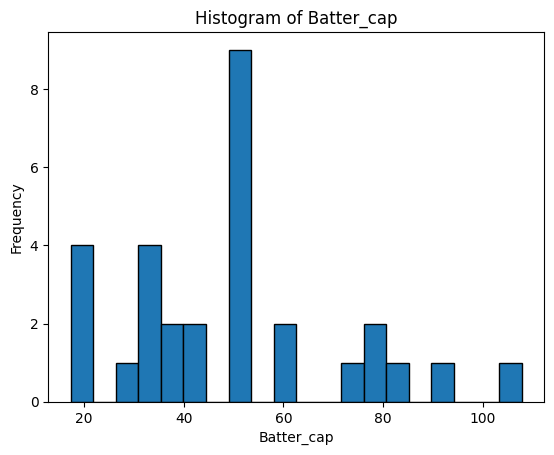

In [26]:
plt.hist(df1['Batter_cap'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Batter_cap')
plt.xlabel('Batter_cap')
plt.ylabel('Frequency')
plt.show()

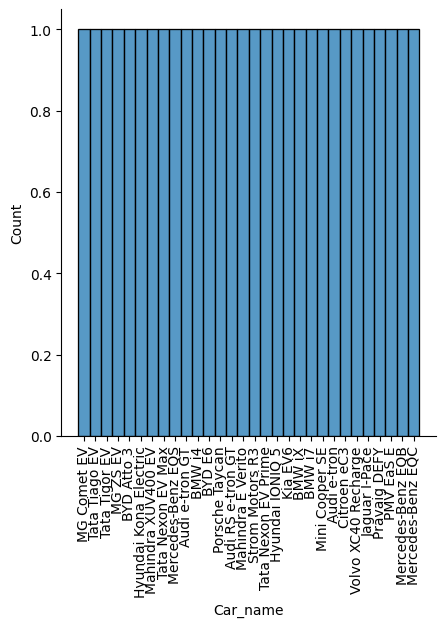

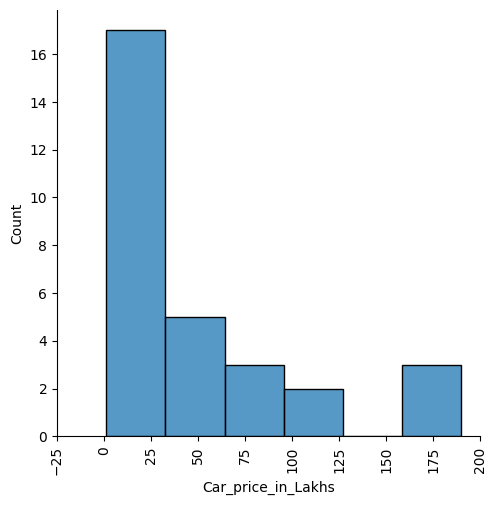

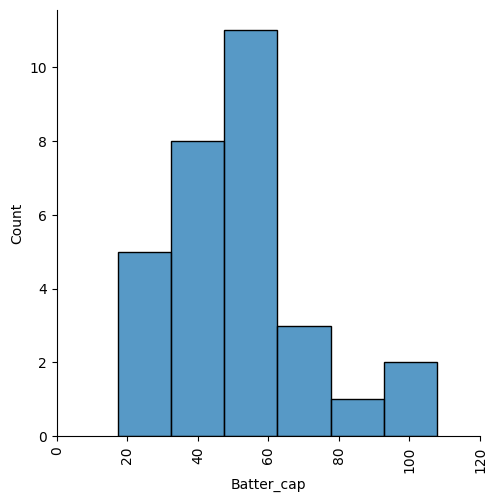

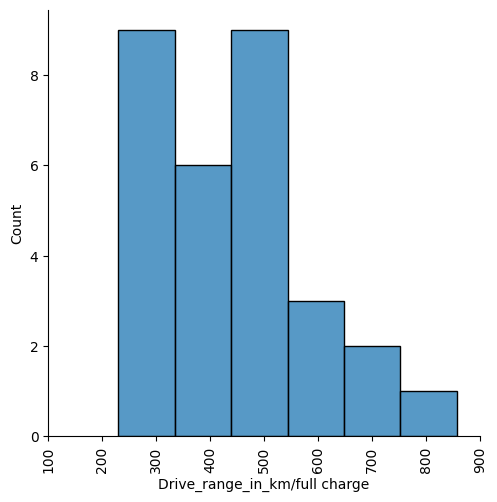

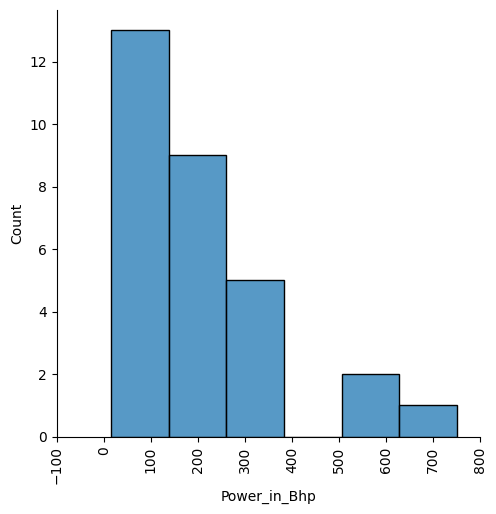

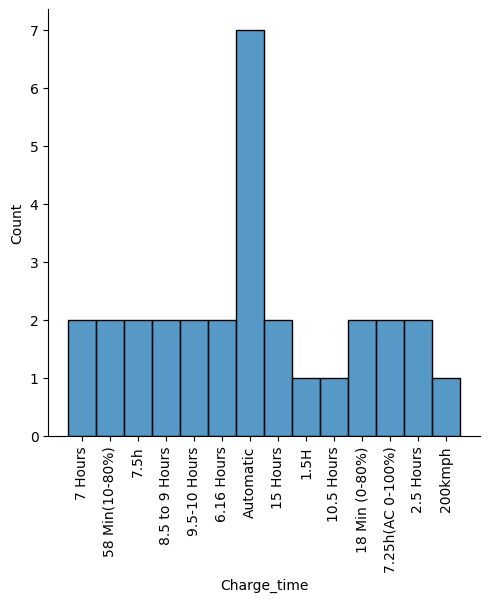

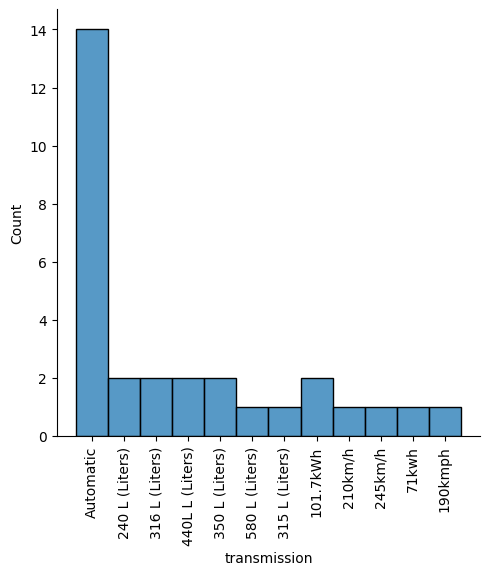

In [27]:
for col in df1.columns:
    ax= sns.displot(df1[col])
    ax.set_xticklabels(rotation=90)

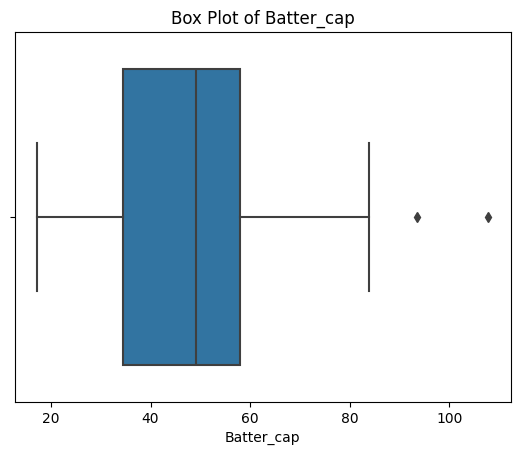

In [28]:
sns.boxplot(x=df1['Batter_cap'])
plt.title('Box Plot of Batter_cap')
plt.show()

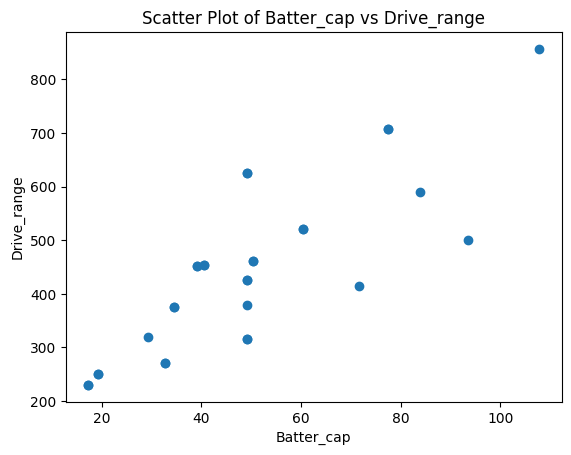

In [29]:
plt.scatter(df1['Batter_cap'], df1['Drive_range_in_km/full charge'])
plt.title('Scatter Plot of Batter_cap vs Drive_range')
plt.xlabel('Batter_cap')
plt.ylabel('Drive_range')
plt.show()

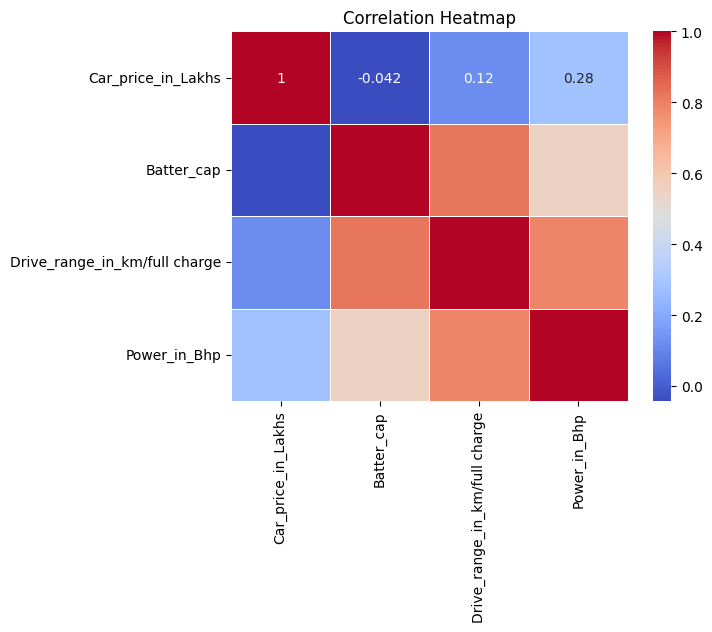

In [30]:
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

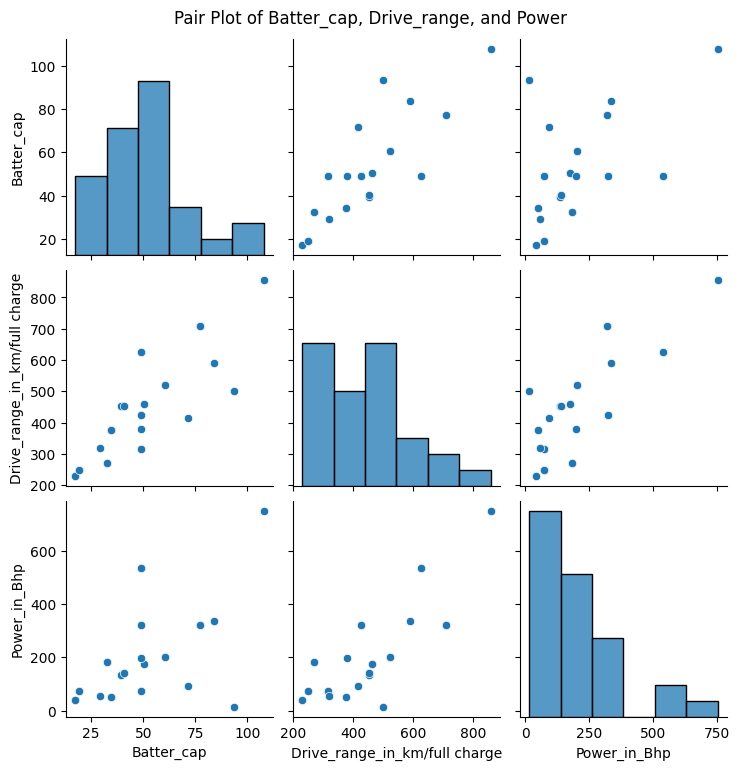

In [31]:
sns.pairplot(df1[['Batter_cap', 'Drive_range_in_km/full charge', 'Power_in_Bhp']])
plt.suptitle('Pair Plot of Batter_cap, Drive_range, and Power', y=1.02)
plt.show()

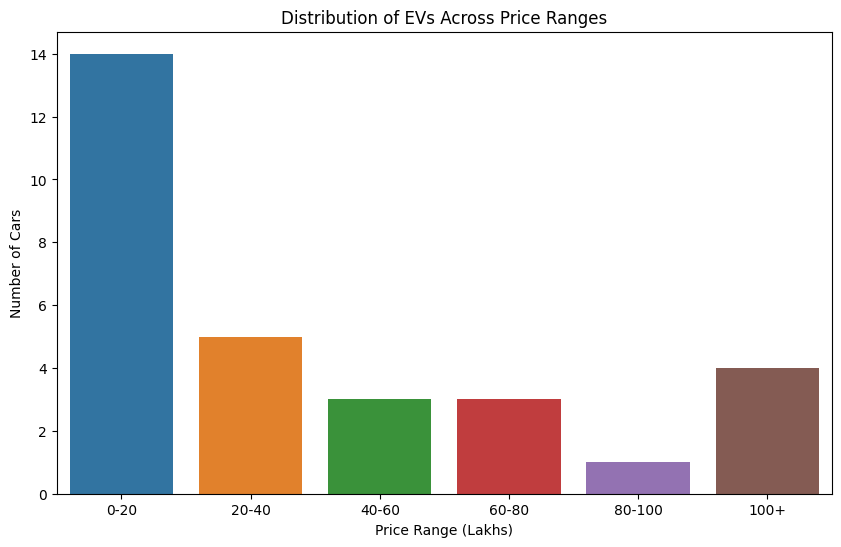

In [32]:
# Create price ranges
bins = [0, 20, 40, 60, 80, 100, float('inf')]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100+']
df1['Price_Range'] = pd.cut(df1['Car_price_in_Lakhs'], bins=bins, labels=labels, right=False)

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Price_Range', data=df1)
plt.title('Distribution of EVs Across Price Ranges')
plt.xlabel('Price Range (Lakhs)')
plt.ylabel('Number of Cars')
plt.show()


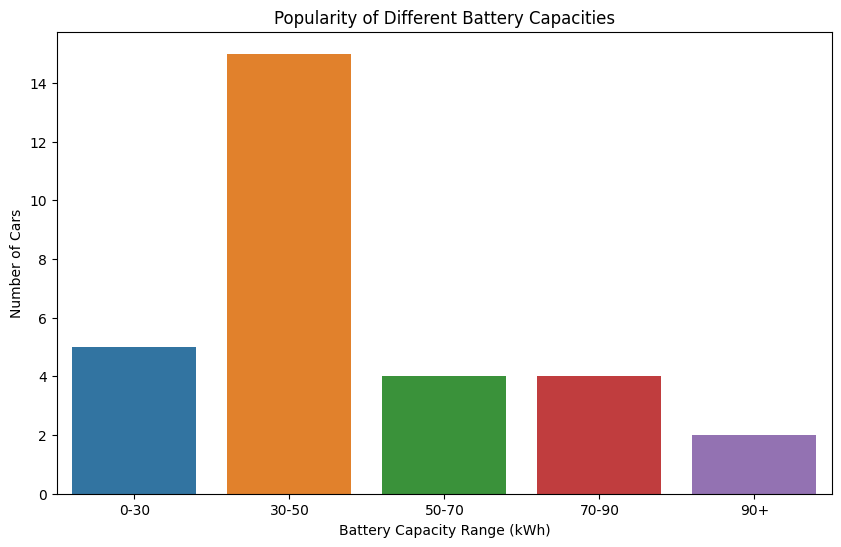

In [33]:
# Create battery capacity bins
bins = [0, 30, 50, 70, 90, float('inf')]
labels = ['0-30', '30-50', '50-70', '70-90', '90+']
df1['Battery_Capacity_Range'] = pd.cut(df1['Batter_cap'], bins=bins, labels=labels, right=False)

# Visualize the popularity
plt.figure(figsize=(10, 6))
sns.countplot(x='Battery_Capacity_Range', data=df1)
plt.title('Popularity of Different Battery Capacities')
plt.xlabel('Battery Capacity Range (kWh)')
plt.ylabel('Number of Cars')
plt.show()


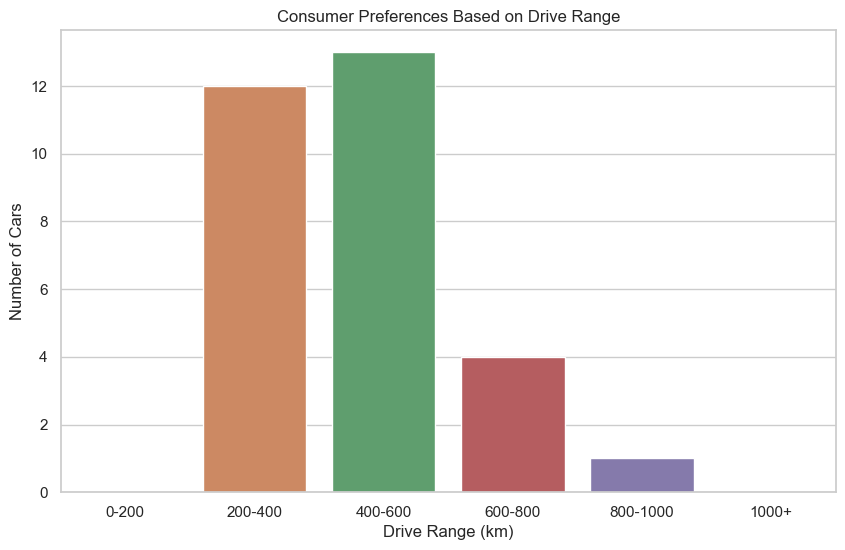

In [53]:
# Create drive range bins
bins = [0, 200, 400, 600, 800, 1000, float('inf')]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000+']
df1['Drive_Range_Range'] = pd.cut(df1['Drive_range_in_km/full charge'], bins=bins, labels=labels, right=False)

# Visualize consumer preferences
plt.figure(figsize=(10, 6))
sns.countplot(x='Drive_Range_Range', data=df1)
plt.title('Consumer Preferences Based on Drive Range')
plt.xlabel('Drive Range (km)')
plt.ylabel('Number of Cars')
plt.show()


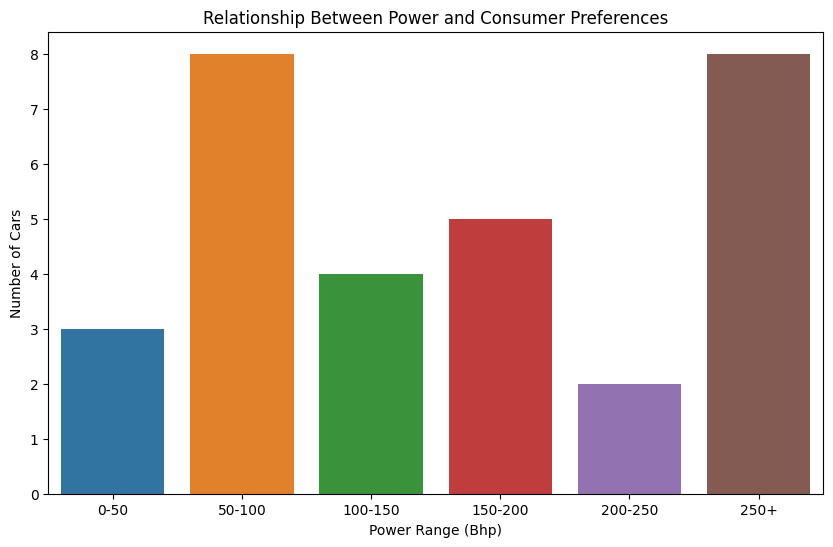

In [35]:
# Create power bins
bins = [0, 50, 100, 150, 200, 250, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250+']
df1['Power_Range'] = pd.cut(df1['Power_in_Bhp'], bins=bins, labels=labels, right=False)

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Power_Range', data=df1)
plt.title('Relationship Between Power and Consumer Preferences')
plt.xlabel('Power Range (Bhp)')
plt.ylabel('Number of Cars')
plt.show()


## Elbow Plot

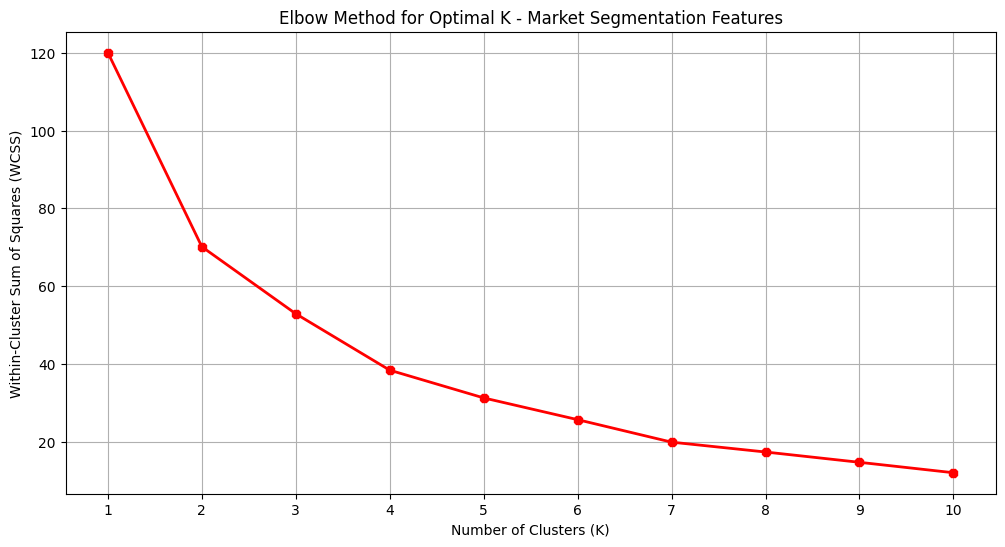

In [36]:
# Select relevant features for clustering based on segmentation criteria
features_for_clustering = df1[['Car_price_in_Lakhs', 'Batter_cap', 'Drive_range_in_km/full charge', 'Power_in_Bhp']].dropna()

# Standardize the data (important for K-Means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=28)
    kmeans.fit(features_for_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(12, 6))    
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Number of Clusters (K)")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K - Market Segmentation Features")
plt.show()


## K-Means

2    11
0    10
1     5
3     4
Name: Cluster, dtype: int64
Cluster Centers:
[[ 24.072       31.53704348 295.          82.237     ]
 [ 52.61        79.11704348 697.6        452.744     ]
 [ 22.78636364  55.0027668  458.27272727 163.28426332]
 [167.5         39.1426087  438.         266.5225    ]]


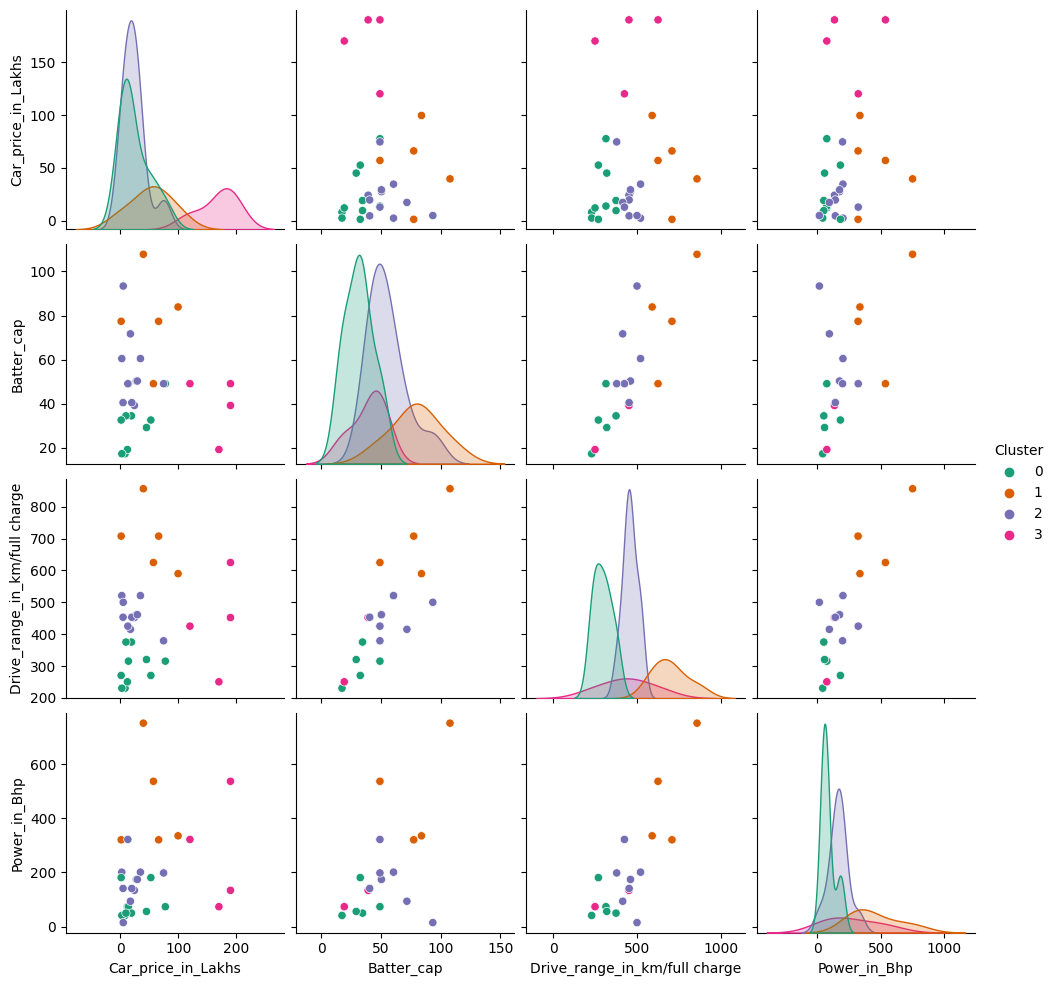

In [37]:
# Assuming you have determined the optimal K value, let's say K=4
optimal_k = 4

# Perform K-Means clustering with the optimal K value
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=28)

# Fit the model to the standardized features
kmeans.fit(features_for_clustering_scaled)

# Add a new column to the DataFrame indicating the cluster for each data point
df1['Cluster'] = kmeans.labels_

# Display the count of data points in each cluster
print(df1['Cluster'].value_counts())

# Display the cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))  # Inverse transform to get original scale

# Visualize the clusters (you can customize this based on the number of features)
sns.pairplot(df1, hue='Cluster', diag_kind='kde', palette='Dark2')
plt.show()


## Second Dataset

In [38]:
# Assuming your file is in the same directory as your script or notebook
file_path = 'Ev Sales.xlsx'

# Read the Excel file into a DataFrame
df2 = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded
df2

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141
...,...,...,...,...,...,...
69,2023-01-01,64649,34308,3490,98,102545
70,2023-02-01,66033,35995,4850,99,106977
71,2023-03-01,86194,45225,8852,89,140360
72,2023-04-01,66755,38016,6193,84,111048


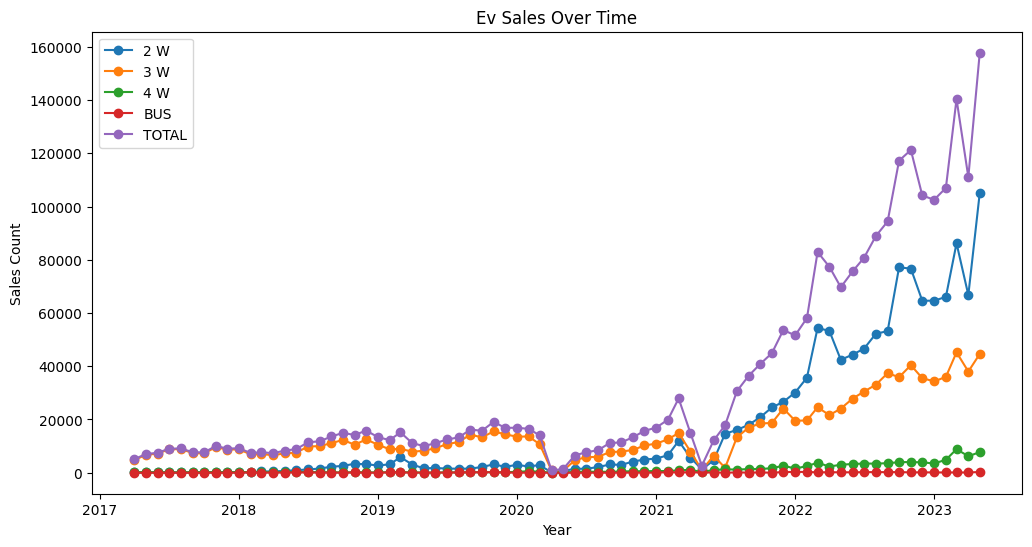

In [39]:
# Convert 'YEAR' column to datetime format
df2['YEAR'] = pd.to_datetime(df2['YEAR'])

# Plot time series for each category
plt.figure(figsize=(12, 6))
plt.plot(df2['YEAR'], df2['2 W'], label='2 W', marker='o')
plt.plot(df2['YEAR'], df2['3 W'], label='3 W', marker='o')
plt.plot(df2['YEAR'], df2['4 W'], label='4 W', marker='o')
plt.plot(df2['YEAR'], df2['BUS'], label='BUS', marker='o')
plt.plot(df2['YEAR'], df2['TOTAL'], label='TOTAL', marker='o')

plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Ev Sales Over Time')
plt.legend()
plt.show()

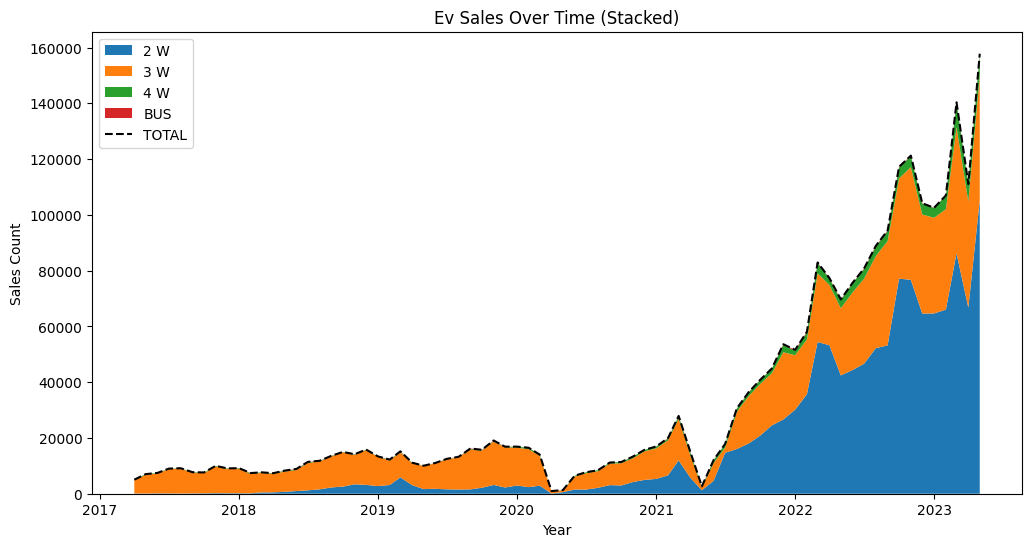

In [40]:
plt.figure(figsize=(12, 6))

# Stack area plots for each category
plt.stackplot(df2['YEAR'], df2['2 W'], df2['3 W'], df2['4 W'], df2['BUS'], labels=['2 W', '3 W', '4 W', 'BUS'])
plt.plot(df2['YEAR'], df2['TOTAL'], label='TOTAL', color='black', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Ev Sales Over Time (Stacked)')
plt.legend(loc='upper left')
plt.show()

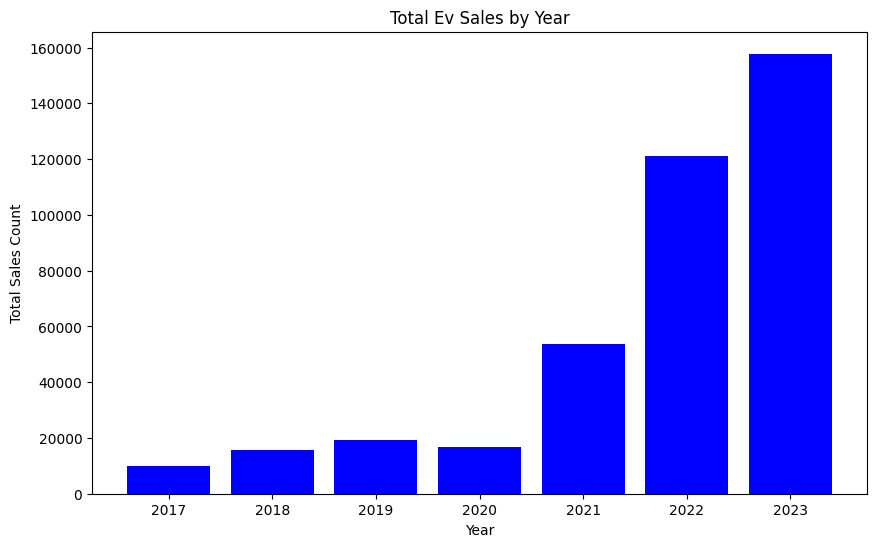

In [41]:
plt.figure(figsize=(10, 6))

# Bar plot for total sales by year
plt.bar(df2['YEAR'].dt.year, df2['TOTAL'], color='blue')

plt.xlabel('Year')
plt.ylabel('Total Sales Count')
plt.title('Total Ev Sales by Year')
plt.show()

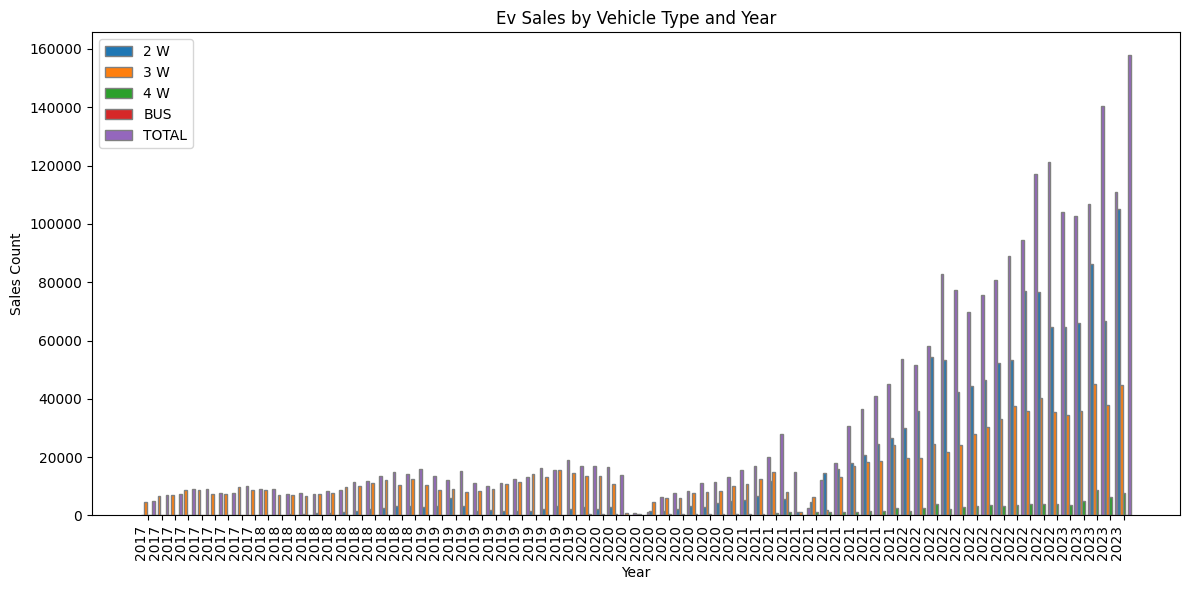

In [42]:
plt.figure(figsize=(12, 6))

# Grouped bar plot for individual categories by year with rotated x-axis labels
barWidth = 0.2
r1 = np.arange(len(df2['YEAR']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, df2['2 W'], width=barWidth, edgecolor='grey', label='2 W')
plt.bar(r2, df2['3 W'], width=barWidth, edgecolor='grey', label='3 W')
plt.bar(r3, df2['4 W'], width=barWidth, edgecolor='grey', label='4 W')
plt.bar(r4, df2['BUS'], width=barWidth, edgecolor='grey', label='BUS')
plt.bar(r5, df2['TOTAL'], width=barWidth, edgecolor='grey', label='TOTAL')

plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Ev Sales by Vehicle Type and Year')
plt.xticks([r + barWidth*2 for r in range(len(df2['YEAR']))], df2['YEAR'].dt.year, rotation=90, ha='right')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Third Dataset

In [43]:
df3 = pd.read_csv('EV_India.csv')

In [44]:
df3

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"
5,6,Chandigarh,2812,"7,46,881","7,49,693"
6,7,Chhattisgarh,20966,"68,36,200","68,57,166"
7,8,Delhi,"1,56,393","76,85,600","78,41,993"
8,9,Goa,3870,"10,71,570","10,75,440"
9,10,Gujarat,45272,"2,06,05,484","2,06,50,756"


In [45]:
df3.isnull().sum()

Sr. No.                       0
State Name                    0
Total Electric Vehicle        4
Total Non-Electric Vehicle    4
Total                         4
dtype: int64

In [46]:
#dropping because the data of them is no available and cannot be assumed
df3.dropna(inplace = True)

In [47]:
df3

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"
5,6,Chandigarh,2812,"7,46,881","7,49,693"
6,7,Chhattisgarh,20966,"68,36,200","68,57,166"
7,8,Delhi,"1,56,393","76,85,600","78,41,993"
8,9,Goa,3870,"10,71,570","10,75,440"
9,10,Gujarat,45272,"2,06,05,484","2,06,50,756"
10,11,Haryana,37035,"1,07,78,270","1,08,15,305"


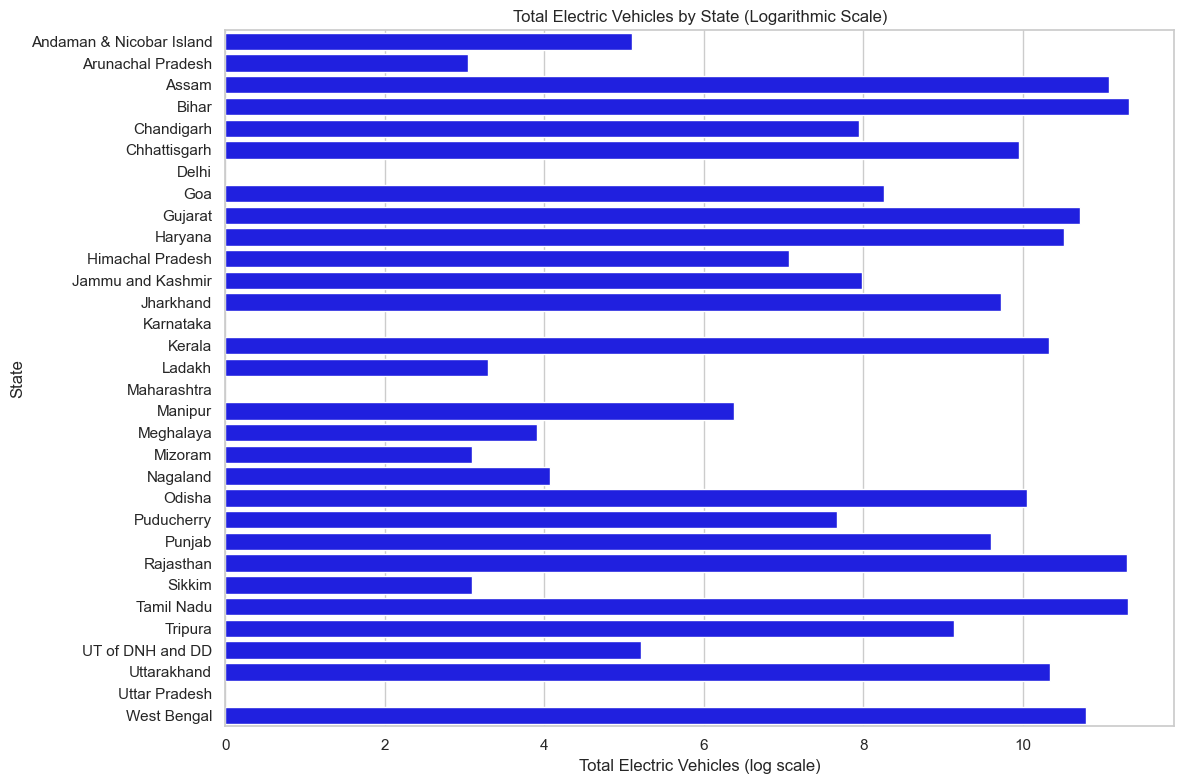

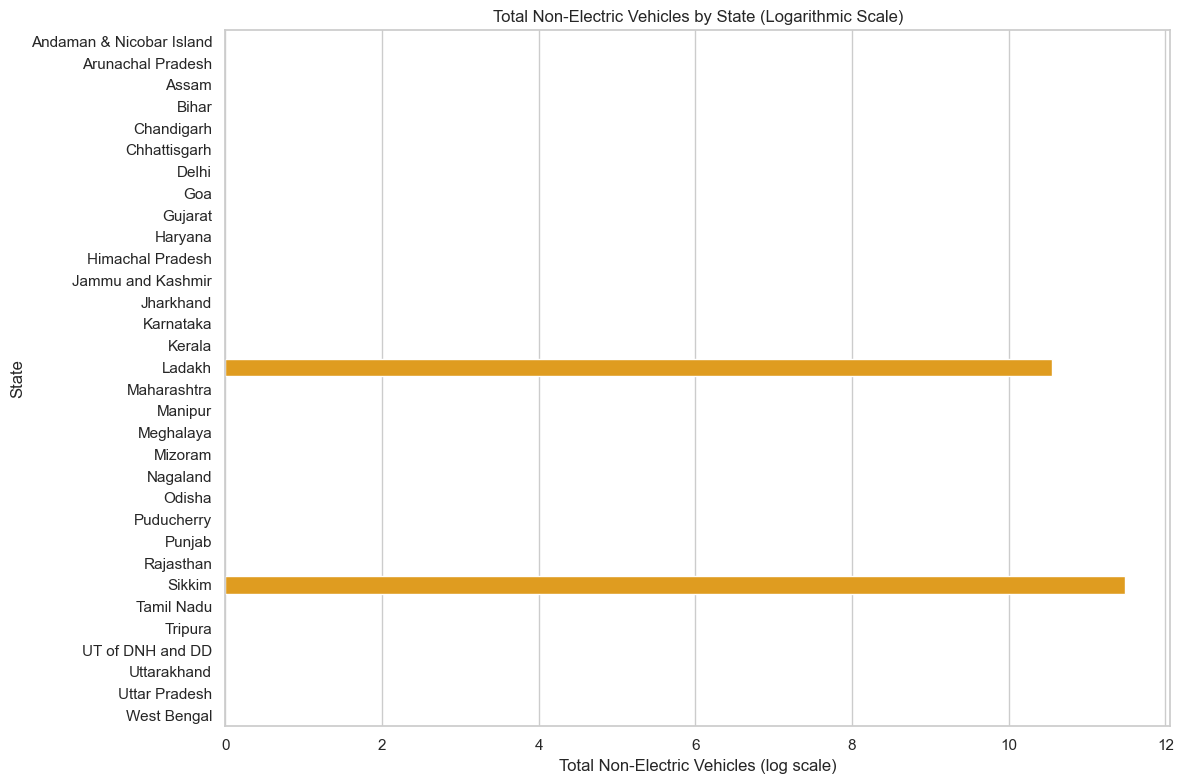

In [51]:
# Set the seaborn style
sns.set(style='whitegrid')

# Replace zeros with NaN and then apply log transformation
df3['log_Total Electric Vehicle'] = np.log1p(df3['Total Electric Vehicle'].replace(0, np.nan))
df3['log_Total Non-Electric Vehicle'] = np.log1p(df3['Total Non-Electric Vehicle'].replace(0, np.nan))

# Plot total electric vehicles by state on a log scale
plt.figure(figsize=(12, 8))
sns.barplot(x='log_Total Electric Vehicle', y='State Name', data=df3, color='blue')
plt.xlabel('Total Electric Vehicles (log scale)')
plt.ylabel('State')
plt.title('Total Electric Vehicles by State (Logarithmic Scale)')
plt.tight_layout()
plt.show()

# Plot total non-electric vehicles by state on a log scale
plt.figure(figsize=(12, 8))
sns.barplot(x='log_Total Non-Electric Vehicle', y='State Name', data=df3, color='orange')
plt.xlabel('Total Non-Electric Vehicles (log scale)')
plt.ylabel('State')
plt.title('Total Non-Electric Vehicles by State (Logarithmic Scale)')
plt.tight_layout()
plt.show()


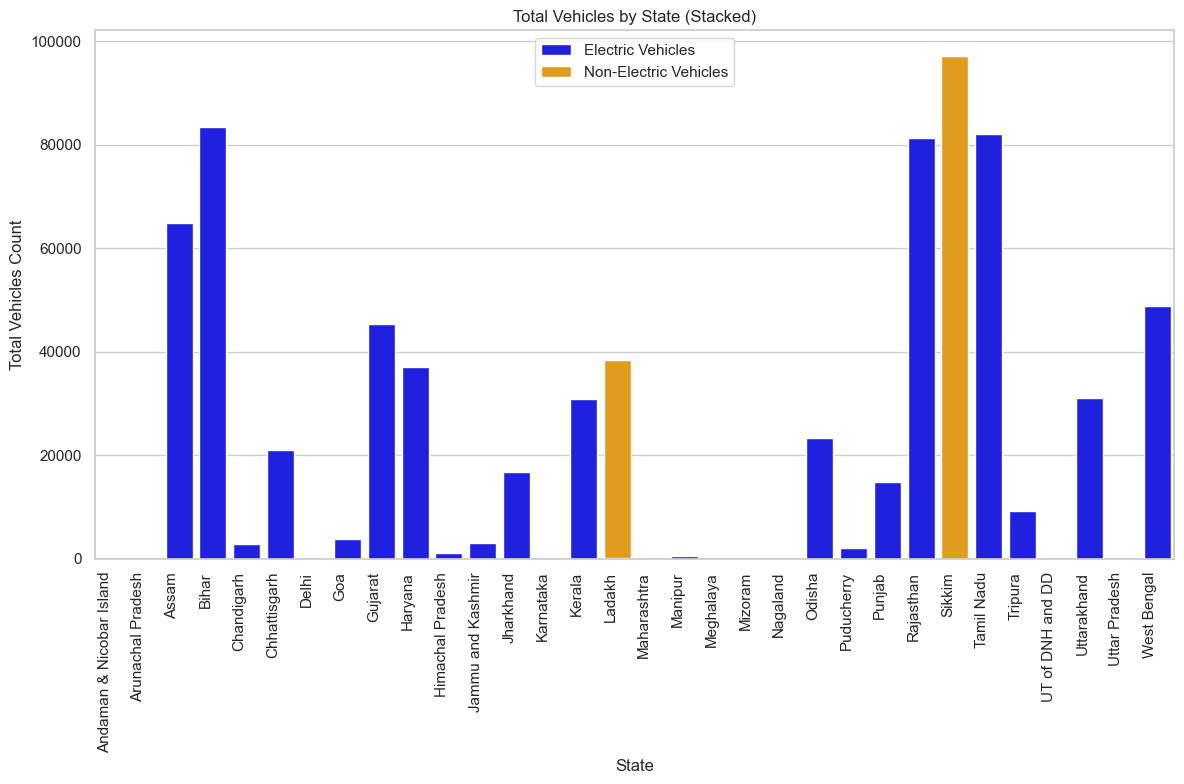

In [52]:
# Plot stacked bar plot for total vehicles by state
plt.figure(figsize=(12, 8))
sns.barplot(x='State Name', y='Total Electric Vehicle', data=df3, color='blue', label='Electric Vehicles')
sns.barplot(x='State Name', y='Total Non-Electric Vehicle', data=df3, color='orange', bottom=df3['Total Electric Vehicle'], label='Non-Electric Vehicles')

plt.xlabel('State')
plt.ylabel('Total Vehicles Count')
plt.title('Total Vehicles by State (Stacked)')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.tight_layout()
plt.show()